In [1]:
from functions.Bending.FullBending import FullBending
import numpy as np
import pandas as pd

Wine está instalado. Versión: wine-9.0
Wine is installed. Calculix will be run with windows binary


In [2]:
from validation.FullExperimental import FullExperimental

df_stats = FullExperimental()
# double layer
layers = df_stats["layers"].values
layers[0] = ["Y","Y"]
df_stats["layers"] = layers


In [3]:
# Material properties

df_layers = pd.DataFrame({ 'E': [0.800000	,   # nucleo GPa
                                 5.198613	,   # X
                                 2.814443		,   # SX
                                 21.284290    ,   # Y
                                 5.775806]}  ,   # SY
                                 index=['nucleo', 'X', 'SX', 'Y', 'SY'])

St_layers = {
    "X"   : 481.083731,   # MPa
    "SX"  : 80.120493,    # MPa
    "Y"   : 667.663085,   # MPa
    "SY"  : 127.036236,   # MPa
    "nucleo" : 0.0,
}

En = df_layers.loc["nucleo"].values[-1]*1e3

params = {
            "El": df_layers.loc[["X","SX","Y","SY"]].values.flatten(),
            "geo" : {
                        "t_n" : 2.934,
                        "t_l" : 0.475,
                        "Lx"  : 30,
                        "meshsizefactor" : 0.75,
                    },
            "sim" : {
                        "disp" : 5.0,
                        "opt": {
                                    "OMP_NUM_THREADS":4,
                                    "mpi_np":4,
                                    "mpi":True
                                },
                        "E_n":  En
                    },
            "tensile" : {
                        "disp" : 3.0,
                        "St_layers": St_layers,
                    },
        }


In [4]:
df_stats

Et [GPa]                 % e              St [MPa]             \
          mean       std      mean       std        mean        std   
Name                                                                  
TFP1  2.885509  0.227295  0.123306  0.009827  279.103333  14.337700   
TFP2  2.258503  0.065626  0.087556  0.002840  153.360000   0.473181   
TFP3  2.000437  0.004435  0.087444  0.002164  137.113333   4.996812   
TFP4  2.451362  0.114353  0.095472  0.005491  184.396667   1.356515   
TFP5  1.626582  0.120272  0.089889  0.013757   99.990000   9.790138   
TFP6  1.739870  0.067515  0.089083  0.010304  104.513333   7.708893   

       Eb [GPa]              t [mm]               b [mm]            \
           mean       std      mean       std       mean       std   
Name                                                                 
TFP1  13.201050  0.630858  5.266667  0.057735  25.600000  0.100000   
TFP2   9.869501  0.780113  4.700000  0.000000  25.566667  0.057735   
TFP3   9.222003  0.495965  4.833333  0.057735  25.400000  0.173205   
TFP4  10.181815  0.770635  4.700000  0.000000  25.666667  0.152753   
TFP5   6.143105  0.161637  5.700000  0.000000  25.166667  0.152753   
TFP6   7.798060  0.334186  5.600000  0.000000  25.033333  0.635085   

        Sb [MPa]                  layers     Vc  
            mean        std                      
Name                                             
TFP1  134.996667  18.942693       [Y, Y]  0.178  
TFP2  117.430000  15.759607       [Y, X]  0.164  
TFP3  128.053333   5.337905      [Y, SX]  0.135  
TFP4  141.703333   7.525386      [Y, SY]  0.144  
TFP5  107.433333   3.902939  [Y, SX, SY]  0.146  
TFP6  114.306667  11.800790   [Y, X, SY]  0.180

In [5]:
import os 
from copy import deepcopy
join = os.path.join


if not os.path.exists("output"):
    os.mkdir("output")

In [6]:
Lx_span = np.linspace(12.5,100,6)

In [7]:
Lx_span

array([ 12.5,  30. ,  47.5,  65. ,  82.5, 100. ])

In [8]:
# int with 4 digits
str_Lx_span = ["Lx_" +str(int(Lx)).zfill(4) for Lx in Lx_span]

str_Lx_span

['Lx_0012', 'Lx_0030', 'Lx_0047', 'Lx_0065', 'Lx_0082', 'Lx_0100']

In [9]:


Lx_loop_results = []

for name_loop,iLx in zip(str_Lx_span, Lx_span):

    print(f"Running for {name_loop} with Lx = {iLx} mm")
    print("=========================================")
    all_params = []

    for id_design in range(6):

        params_loop = deepcopy(params)
        # =============================================================================
        params_loop["geo"]["Ly"]  = df_stats["b [mm]"]["mean"].iloc[id_design]
        params_loop["geo"]["Lx"]  = iLx
        
        lyrs = df_stats["layers"].iloc[id_design]
        E_l  = df_layers.loc[lyrs]["E"].values*1e3 # MPa
        params_loop["sim"]["E_l"] = E_l
        params_loop["sim"]["name_mat"] = df_stats["layers"].iloc[id_design]
        # =============================================================================
        name = df_stats.index[id_design]
        params_loop["output_folder"] = join("output",name_loop, name)

        if not os.path.exists(params_loop["output_folder"]):
            os.makedirs(params_loop["output_folder"])
        
        inp_f = FullBending(params_loop)
        
        all_params.append(params_loop)    
    
    Lx_loop_results.append(all_params)

Running for Lx_0012 with Lx = 12.5 mm
Geo file output/Lx_0012/TFP1/geo/composite_layers.inp already exists. Skipping geometry creation.
Simulation file output/Lx_0012/TFP1/sim/main.inp already exists. Skipping simulation creation.
['Y', 'Y', 'nucleo', 'Y', 'Y']
Time Step:
Time Step:
Time Step:
Geo file output/Lx_0012/TFP2/geo/composite_layers.inp already exists. Skipping geometry creation.
Simulation file output/Lx_0012/TFP2/sim/main.inp already exists. Skipping simulation creation.
['X', 'Y', 'nucleo', 'Y', 'X']
Time Step:
Time Step:
Time Step:
Geo file output/Lx_0012/TFP3/geo/composite_layers.inp already exists. Skipping geometry creation.
Simulation file output/Lx_0012/TFP3/sim/main.inp already exists. Skipping simulation creation.
['SX', 'Y', 'nucleo', 'Y', 'SX']
Time Step:
Time Step:
Time Step:
Geo file output/Lx_0012/TFP4/geo/composite_layers.inp already exists. Skipping geometry creation.
Simulation file output/Lx_0012/TFP4/sim/main.inp already exists. Skipping simulation creati

In [10]:
df_stats_all = []
for kall_params in Lx_loop_results:
    idf_stats = df_stats.copy()
    idf_stats["Eb pred [GPa]"]  = [ iall_params["Eflex"] for iall_params in kall_params]
    idf_stats["Eb analytical pred [GPa]"]  = [ iall_params["Eflexion_analytical"] for iall_params in kall_params]
    idf_stats["Sb pred [MPa]"] = [ iall_params["rpostbending"] for iall_params in kall_params]
    idf_stats["Et analytical pred [GPa]"]  = [ iall_params["Etensile_analytical"] for iall_params in kall_params]
    tau_pred  = [ iall_params["geo"]["t_t"] for iall_params in kall_params]
    idf_stats["t pred [mm]"] = tau_pred
    df_stats_all.append(idf_stats)

In [11]:
df_stats_all[0]["Eb analytical pred [GPa]"]

Name
TFP1    16.704123
TFP2     8.962115
TFP3     7.814618
TFP4     9.239917
TFP5     6.965985
TFP6     7.635849
Name: Eb analytical pred [GPa], dtype: float64

In [12]:
df_stats_all[0]["Et [GPa]"]

,mean,std
Name,,
TFP1,2.885509,0.227295
TFP2,2.258503,0.065626
TFP3,2.000437,0.004435
TFP4,2.451362,0.114353
TFP5,1.626582,0.120272
TFP6,1.739870,0.067515


In [13]:
TFP_str = ["TFP1", "TFP2", "TFP3", "TFP4", "TFP5", "TFP6"]
TFP_Eb = [ [ ids["Eb pred [GPa]"].loc[TFP] 
            for ids in df_stats_all] 
            for TFP in TFP_str ]

TFP_Eb_ana = [ [ ids["Eb analytical pred [GPa]"].loc[TFP]
            for ids in df_stats_all][0]
            for TFP in TFP_str ]

TFP_Et_ana = [ [ ids["Et analytical pred [GPa]"].loc[TFP]
            for ids in df_stats_all][0]
            for TFP in TFP_str ]

In [14]:
TFP_Eb_ana

[np.float64(16.704123078475284),
 np.float64(8.96211512405766),
 np.float64(7.8146183102969555),
 np.float64(9.239917096410716),
 np.float64(6.965985135408507),
 np.float64(7.635849035478254)]

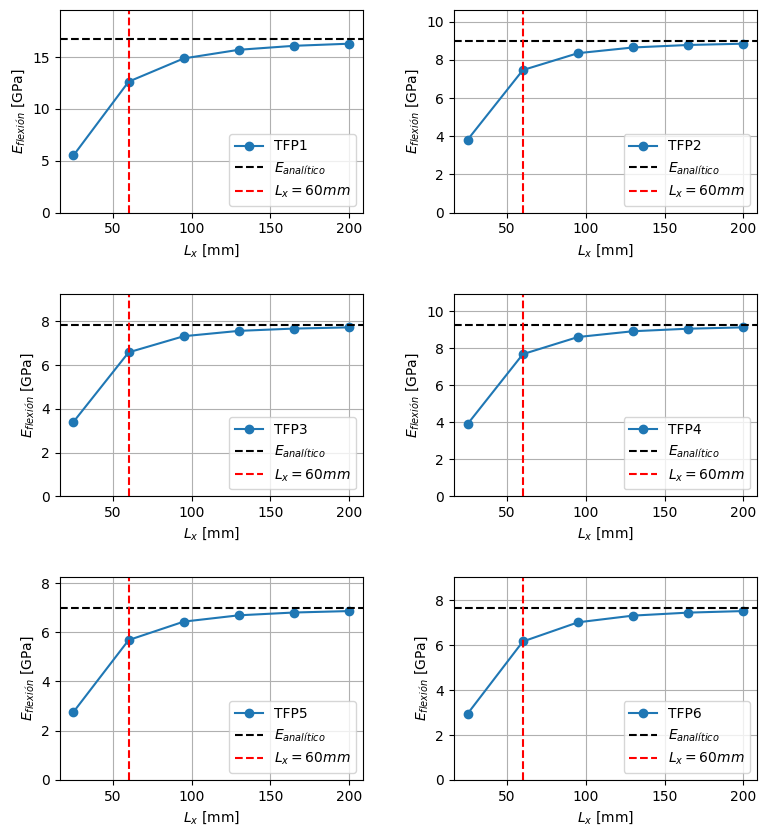

In [51]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(9, 10))
#padding 
fig.subplots_adjust(hspace=0.4, wspace=0.3)
for iTFP, TFP in enumerate(TFP_str):
    plt.subplot(3, 2, iTFP+1)
    plt.plot(2*Lx_span, TFP_Eb[iTFP], label=TFP,marker="o", linestyle="-")
    plt.axhline(TFP_Eb_ana[iTFP], linestyle="--", color="k", 
                label=r"$E_{analítico}$")
    
    plt.xlabel("$L_x$ [mm]")
    plt.ylabel(r"$E_{flexión}$ [GPa]")
    factor = TFP_Eb[iTFP][1]/TFP_Eb_ana[iTFP]
    # plt.title(f"{TFP}   |   "+"$E_{60}/E_{analítico}:"+f" {factor:.2f}$")
    # plt.title(f"{TFP}")
    plt.ylim(0, 1.2*max(TFP_Eb[iTFP]))
    plt.grid()
    # vrtical at 60mm 
    plt.axvline(60, linestyle="--", color="r", label=r"$L_x = 60 mm$")
    plt.legend()

In [16]:
TFP_Eb_ana

[np.float64(16.704123078475284),
 np.float64(8.96211512405766),
 np.float64(7.8146183102969555),
 np.float64(9.239917096410716),
 np.float64(6.965985135408507),
 np.float64(7.635849035478254)]

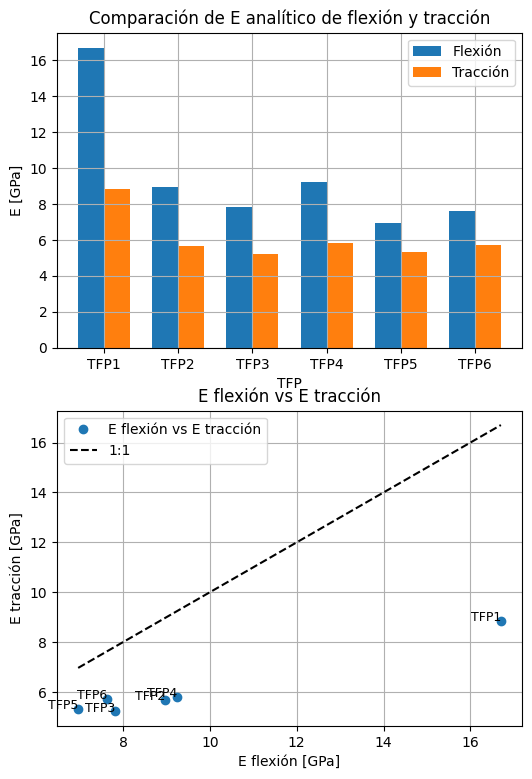

In [17]:
# bar plot analytical traction vs flexion

plt.figure(figsize=(6, 9))
plt.subplot(2,1,1)
x = np.arange(len(TFP_str))
width = 0.35  # the width of the bars
plt.bar(x - width/2, TFP_Eb_ana, width, label='Flexión')
plt.bar(x + width/2, TFP_Et_ana, width, label='Tracción')
plt.xlabel('TFP')
plt.ylabel('E [GPa]')
plt.title('Comparación de E analítico de flexión y tracción')
plt.xticks(x, TFP_str)
plt.legend()
plt.grid()
plt.subplot(2,1,2)
plt.plot(TFP_Eb_ana, TFP_Et_ana, marker='o', linestyle='none', label='E flexión vs E tracción')
for i, TFP in enumerate(TFP_str):
    plt.text(TFP_Eb_ana[i], TFP_Et_ana[i], TFP, fontsize=9, ha='right')
plt.xlabel('E flexión [GPa]')
plt.ylabel('E tracción [GPa]')
plt.title('E flexión vs E tracción')
plt.grid()
# 1vs1 
plt.plot([min(TFP_Eb_ana), max(TFP_Eb_ana)], 
         [min(TFP_Eb_ana), max(TFP_Eb_ana)], linestyle='--', color='k', label='1:1')
plt.legend()

/tmp/ipykernel_859182/3955085854.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_stats["Eb [GPa]"]["mean"][i], df_stats["Et [GPa]"]["mean"][i], TFP, fontsize=9, ha='right')


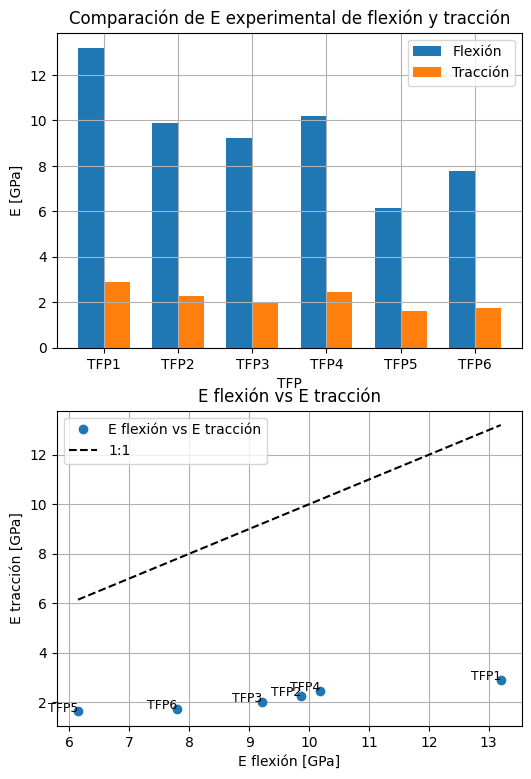

In [18]:
# experimental  
df_stats["Eb [GPa]"]["mean"]
df_stats["Et [GPa]"]["mean"]

# bar plots 
x = np.arange(len(TFP_str))
width = 0.35  # the width of the bars
plt.figure(figsize=(6, 9))
plt.subplot(2,1,1)
plt.bar(x - width/2, df_stats["Eb [GPa]"]["mean"],
        width, label='Flexión')
plt.bar(x + width/2, df_stats["Et [GPa]"]["mean"],
        width, label='Tracción')
plt.xlabel('TFP')
plt.ylabel('E [GPa]')
plt.title('Comparación de E experimental de flexión y tracción')
plt.grid()
plt.legend()
plt.xticks(x, TFP_str)
plt.subplot(2,1,2)
plt.plot(df_stats["Eb [GPa]"]["mean"], df_stats["Et [GPa]"]["mean"],
         marker='o', linestyle='none', label='E flexión vs E tracción')
for i, TFP in enumerate(TFP_str):
    plt.text(df_stats["Eb [GPa]"]["mean"][i], df_stats["Et [GPa]"]["mean"][i], TFP, fontsize=9, ha='right')
plt.xlabel('E flexión [GPa]')
plt.ylabel('E tracción [GPa]')
plt.title('E flexión vs E tracción')
plt.grid()
plt.legend()
# 1vs1
plt.plot([min(df_stats["Eb [GPa]"]["mean"]), max(df_stats["Eb [GPa]"]["mean"])], 
         [min(df_stats["Eb [GPa]"]["mean"]), max(df_stats["Eb [GPa]"]["mean"])], 
         linestyle='--', color='k', label='1:1')
plt.legend()

/tmp/ipykernel_859182/2352891751.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ratio_flex_trac_exp = [ df_stats["Eb [GPa]"]["mean"][i]/df_stats["Et [GPa]"]["mean"][i] for i in range(len(TFP_str)) ]


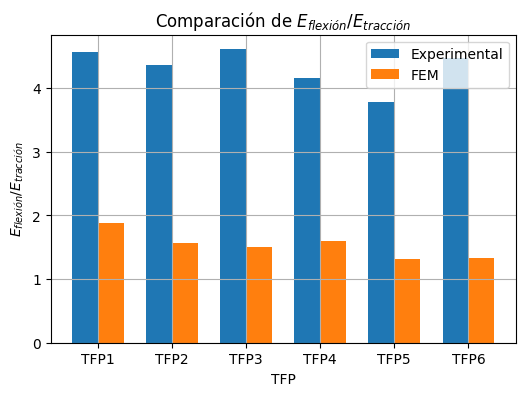

In [19]:
ratio_flex_trac = [ TFP_Eb_ana[i]/TFP_Et_ana[i] for i in range(len(TFP_str)) ]
ratio_flex_trac_exp = [ df_stats["Eb [GPa]"]["mean"][i]/df_stats["Et [GPa]"]["mean"][i] for i in range(len(TFP_str)) ]
plt.figure(figsize=(6, 4))
x = np.arange(len(TFP_str))
width = 0.35  # the width of the bars
plt.bar(x - width/2, ratio_flex_trac_exp, width, label='Experimental')
plt.bar(x + width/2, ratio_flex_trac, width, label='FEM')
plt.xlabel('TFP')
plt.xlabel('TFP')
plt.ylabel(r"$E_{flexión}/E_{tracción}$")
plt.title(r'Comparación de $E_{flexión}/E_{tracción}$')
plt.xticks(x, TFP_str)
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Comparación de $E_{flexión}/E_{tracción}$')

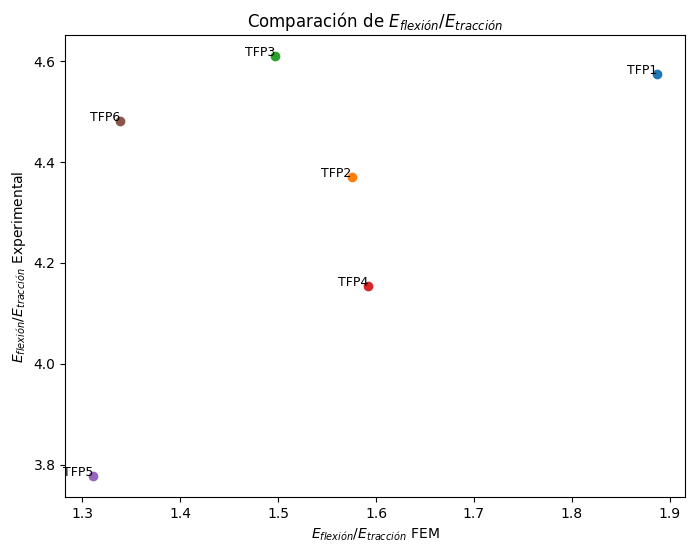

In [20]:
# x vs y 
plt.figure(figsize=(8, 6))
for iTFP, TFP in enumerate(TFP_str):    
    plt.plot(ratio_flex_trac[iTFP], ratio_flex_trac_exp[iTFP], marker='o', linestyle='-', label=TFP)
    plt.text(ratio_flex_trac[iTFP], ratio_flex_trac_exp[iTFP], TFP, fontsize=9, ha='right')
plt.xlabel(r"$E_{flexión}/E_{tracción}$ FEM")
plt.ylabel(r"$E_{flexión}/E_{tracción}$ Experimental")
plt.title(r'Comparación de $E_{flexión}/E_{tracción}$')

/tmp/ipykernel_859182/3298415964.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(df_stats["Eb [GPa]"]["mean"][i],
/tmp/ipykernel_859182/3298415964.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_stats["Et [GPa]"]["mean"][i], TFP, fontsize=9, ha='right')


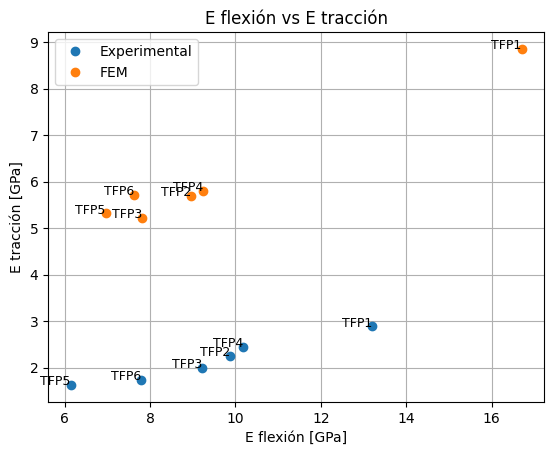

In [21]:
plt.plot(df_stats["Eb [GPa]"]["mean"], df_stats["Et [GPa]"]["mean"],
         marker='o', linestyle='none', label="Experimental")
for i, TFP in enumerate(TFP_str):
    plt.text(df_stats["Eb [GPa]"]["mean"][i], 
             df_stats["Et [GPa]"]["mean"][i], TFP, fontsize=9, ha='right')



plt.plot(TFP_Eb_ana, TFP_Et_ana, marker='o', linestyle='none', label='FEM')
for i, TFP in enumerate(TFP_str):
    plt.text(TFP_Eb_ana[i], TFP_Et_ana[i], TFP, fontsize=9, ha='right')
plt.xlabel('E flexión [GPa]')
plt.ylabel('E tracción [GPa]')
plt.title('E flexión vs E tracción')
plt.grid()
plt.legend()

In [22]:
TFP_Eb

[[np.float64(5.51507132847271),
  np.float64(12.630373157812446),
  np.float64(14.872159460385012),
  np.float64(15.706182521968039),
  np.float64(16.08912769617717),
  np.float64(16.29323228792881)],
 [np.float64(3.82078314510414),
  np.float64(7.463201058338979),
  np.float64(8.348077204072363),
  np.float64(8.64622976309796),
  np.float64(8.776726609300864),
  np.float64(8.843943475537005)],
 [np.float64(3.401763045590269),
  np.float64(6.580168381307936),
  np.float64(7.318167124207056),
  np.float64(7.5619279622637965),
  np.float64(7.66760964096716),
  np.float64(7.721746397397358)],
 [np.float64(3.90704191888742),
  np.float64(7.669670253570873),
  np.float64(8.594813707608083),
  np.float64(8.907105854897583),
  np.float64(9.044128308734745),
  np.float64(9.114869106801944)],
 [np.float64(2.760704752787856),
  np.float64(5.679760616711084),
  np.float64(6.428922279694115),
  np.float64(6.685347494021477),
  np.float64(6.798661705892691),
  np.float64(6.8575735108820695)],
 [np.

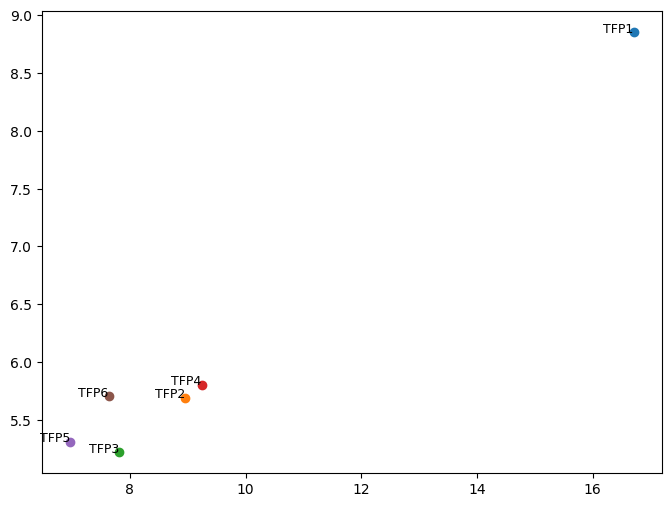

In [23]:
# x vs y 
plt.figure(figsize=(8, 6))
for iTFP, TFP in enumerate(TFP_str):
    plt.plot(TFP_Eb_ana[iTFP], TFP_Et_ana[iTFP], marker='o', linestyle='-', label=TFP)
    plt.text(TFP_Eb_ana[iTFP], TFP_Et_ana[iTFP], TFP, fontsize=9, ha='right')

In [24]:
fdfdf

NameError: name 'fdfdf' is not defined

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(131)

plt.bar(idx_range+width , 
        df_stats['t [mm]']['mean'], 
        yerr  = df_stats['t [mm]']['std'], 
        label ='Experimental',
        width = width)

plt.bar(idx_range, tau_pred, 
        label='Predicted', 
        alpha=0.5, 
        width=width)
plt.title('Espesor (mm)')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('') 
plt.grid()
plt.xticks(idx_range, idx);

ax = fig.add_subplot(132)

# plot bars with error bars Modulo Tracción [MPa] and prediction

plt.bar(idx_range+width , 
        df_stats['Eb [GPa]']['mean'], 
        yerr  = df_stats['Eb [GPa]']['std'], 
        label = 'Experimental',
        width = width)

plt.bar(idx_range, df_stats['Eb pred [GPa]'], 
        label='Predicted', 
        alpha=0.5, 
        width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(133)

# plot bars with error bars St [MPa] and prediction
Et_exp = df_stats["Et [GPa]"]["mean"]
Et_exp_err = df_stats["Et [GPa]"]["std"]

plt.bar(idx_range+width ,
         Et_exp, 
         yerr=Et_exp_err, label='Experimental',width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


In [ ]:
df_stats

In [ ]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(9, 9))
# subplot 
fig.subplots_adjust(hspace=0.35, wspace=0.35)

ax = fig.add_subplot(222)

# plot bars with error bars Modulo Flexion [GPa] and prediction

plt.bar(idx_range+width , df_stats['Eb [GPa]']['mean'], yerr=df_stats['Eb [GPa]']['std'], label='Experimental',width=width)
plt.bar(idx_range, df_stats['Eb pred [GPa]'], label='FEM', alpha=0.5, width=width)

Eb_pred_1   = df_stats['Eb pred [GPa]'].values[0]
Eb_analytical_1 = df_stats['Eb analytical pred [GPa]'].values[0]
# factor = Eb_pred_1/Eb_analytical_1
# plt.bar(idx_range-width, factor*df_stats['Eb analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)

plt.bar(idx_range-width, df_stats['Eb analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)

plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(221)

# plot bars with error bars Modulo Tracción [MPa] and prediction
Et_exp = df_stats["Et [GPa]"]["mean"]
Et_exp_err = df_stats["Et [GPa]"]["std"]

plt.bar(idx_range+width , Et_exp, yerr=Et_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Et pred [GPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['Et analytical pred [GPa]'], label='Analytical', alpha=0.5, width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


ax = fig.add_subplot(223)

# 
St_exp = df_stats["St [MPa]"]["mean"]
St_exp_err = df_stats["St [MPa]"]["std"]

plt.bar(idx_range+width , St_exp, yerr=St_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['St pred [MPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, df_stats['St analytical pred [MPa]'], label='Analytical', alpha=0.5, width=width)

plt.legend()
plt.grid()
# off xlabel

plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Tensión máxima Tracción  [MPa]')
# ========================
ax = fig.add_subplot(224)

Sb_exp = df_stats["Sb [MPa]"]["mean"]
Sb_exp_err = df_stats["Sb [MPa]"]["std"]

plt.bar(idx_range+width , Sb_exp, yerr=Sb_exp_err, label='Experimental',width=width)
plt.bar(idx_range, df_stats['Sb pred [MPa]'], label='FEM', alpha=0.5, width=width)
plt.bar(idx_range-width, 1e3*df_stats['Sb analytical pred [MPa]'], label='Analytical', alpha=0.5, width=width)

plt.title('Tensión máxima Flexión [MPa]')
plt.xlabel('')
plt.xticks(rotation=45)
plt.xticks(idx_range, idx);
plt.legend()
plt.grid()

In [ ]:
df_stats['Sb analytical pred [MPa]'].values*1e3

In [ ]:
# plot bars with error bars Espesor (mm)
width = 0.3
idx = df_stats.index
idx_range = np.arange(len(idx))

fig = plt.figure(figsize=(9, 7))
# subplot 
fig.subplots_adjust(hspace=0.35, wspace=0.35)

ax = fig.add_subplot(222)

# plot bars with error bars Modulo Flexion [GPa] and prediction

plt.bar(idx_range, df_stats['Eb pred [GPa]'], label='FEM', width=width)

Eb_pred_1   = df_stats['Eb pred [GPa]'].values[0]
Eb_analytical_1 = df_stats['Eb analytical pred [GPa]'].values[0]

plt.bar(idx_range-width, df_stats['Eb analytical pred [GPa]'], label='Analítico', width=width)

plt.legend()
plt.grid()
# off xlabel
plt.xlabel('') 
plt.xticks(rotation=45)
# tick labels 
plt.xticks(idx_range, idx);

plt.title('Modulo Flexión [GPa]')

ax = fig.add_subplot(221)

# plot bars with error bars Modulo Tracción [MPa] and prediction
Et_exp = df_stats["Et [GPa]"]["mean"]
Et_exp_err = df_stats["Et [GPa]"]["std"]

plt.bar(idx_range, df_stats['Et pred [GPa]'], label='FEM', width=width)
plt.bar(idx_range-width, df_stats['Et analytical pred [GPa]'], label='Analítico',  width=width)
plt.legend()
plt.grid()
# off xlabel
plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Modulo Tracción [GPa]')


ax = fig.add_subplot(223)

# 
St_exp = df_stats["St [MPa]"]["mean"]
St_exp_err = df_stats["St [MPa]"]["std"]

plt.bar(idx_range, df_stats['St pred [MPa]'], label='FEM', width=width)
plt.bar(idx_range-width, df_stats['St analytical pred [MPa]'], label='Analítico', width=width)

plt.legend()
plt.grid()
# off xlabel

plt.xlabel('')
plt.xticks(rotation=45)
# tick labels
plt.xticks(idx_range, idx);
plt.title('Tensión máxima Tracción  [MPa]')
# ========================
ax = fig.add_subplot(224)

Sb_exp = df_stats["Sb [MPa]"]["mean"]
Sb_exp_err = df_stats["Sb [MPa]"]["std"]

plt.bar(idx_range, df_stats['Sb pred [MPa]'], label='FEM', width=width)
plt.bar(idx_range-width, 1e3*df_stats['Sb analytical pred [MPa]'], label='Analítico', width=width)

plt.title('Tensión máxima Flexión [MPa]')
plt.xlabel('')
plt.xticks(rotation=45)
plt.xticks(idx_range, idx);
plt.legend()
plt.grid()

In [ ]:
df_stats['Sb analytical pred [MPa]']*1e3

In [ ]:
Et_exp

In [ ]:
df_stats

In [ ]:
df_save = pd.DataFrame({"Eb [GPa]"        : df_stats['Eb [GPa]']['mean'].values,
                        "Eb pred [GPa]"   : df_stats['Eb pred [GPa]'].values,
                        "Et [GPa]"        : df_stats["Et [GPa]"]["mean"].values,
                        "Et pred [GPa]"   : df_stats['Et pred [GPa]'].values,
                        "Name": df_stats.index})

df_save.to_csv("output.csv", index=False)

In [ ]:
plt.plot(df_stats["Eb analytical pred [GPa]"],df_stats["Eb pred [GPa]"],'o')
plt.plot([0,15],[0,15],'r--')
plt.grid()
plt.ylabel("FEM")
plt.xlabel("Analytical")
plt.title("Modulo Flexión [GPa]")

for i in range(len(df_stats)):
    plt.text(df_stats["Eb analytical pred [GPa]"].iloc[i],
             df_stats["Eb pred [GPa]"].iloc[i],
             df_stats.index[i])
plt.xlim(0,25)
plt.ylim(0,25)

In [ ]:
params

In [ ]:
El = df_layers.loc["Y"].values
En = df_layers.loc["nucleo"].values
tn = params["geo"]["t_n"]
tl = params["geo"]["t_l"]

In [ ]:
print("El", El)
print("En", En)
print("tn", tn)
print("tl", tl)

In [ ]:
E_eff = (En*tn + 2*(2*El*tl)) / (tn + 2*(2*tl))
print(E_eff)